# Inagural Project - IntroProg

We consider a utility maximization problem with the following model specifications

$L_M$, $L_F$ denotes hours worked by male and female respectively. $w_M$, $w_F$ is the wages for the workers. Hours worked at home are given by $H_M$, $H_F$. 

Consumption of market goods must satisfy the budget constraint, i.e.:

$$
C = w_ML_M+w_FL_f
$$

1. Illustrate how $H_F/H_M$ changes when varying $\alpha$

In [2]:
# We start by importing the solver class from the provided code

from HouseholdSpecializationModel import *

In [3]:
# Storing values in lists

alpha_values = [0.25, 0.5, 0.75]
sigma_values = [0.5, 1, 1.5]

# Creating empty list for HF/HM

H_div = []

# Looping through values of alpha, sigma and finding corresponding HF/HM

for i, j in zip(alpha_values, sigma_values):
    # Instantiating object to the Household Class
    optimize = HouseholdSpecializationModelClass()
    # Setting object attributes equal to the i,j values from the value lists
    optimize.par.alpha = i
    optimize.par.sigma = j
    # Defining optimize class method 
    opt = optimize.solve_discrete()
    # Calling optimize class method while appending the function values (divided) to the empty list
    np.array(H_div.append(opt.HF/opt.HM))

# Checing results
H_div

[0.3076923076923077, 1.0, 3.25]

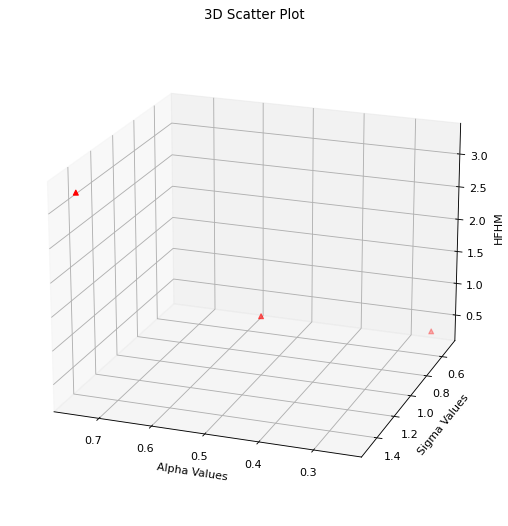

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a figure with transparent background
fig = plt.figure(figsize=(10, 8), dpi=80, facecolor='none')

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Plot the values

ax.scatter(alpha_values, sigma_values, H_div, marker='^', c='red')

# Set the labels and title
ax.set_xlabel('Alpha Values')
ax.set_ylabel('Sigma Values')
ax.set_zlabel('HFHM', rotation=90, fontsize=10) # rotate the z-label by 90 degrees and increase font size
ax.set_title('3D Scatter Plot')

# Add a dotted grid
ax.grid(True, linestyle='dotted')

# Set the viewing angle
ax.view_init(elev=20, azim=110)

# Show the plot
plt.show()

2. plot $log H_F/H_M$ against $log w_F/w_M$ for $w_F \in [0.8, 0.9, 1, 1.1, 1.2]$

Text(0, 0.5, 'log wF/wM')

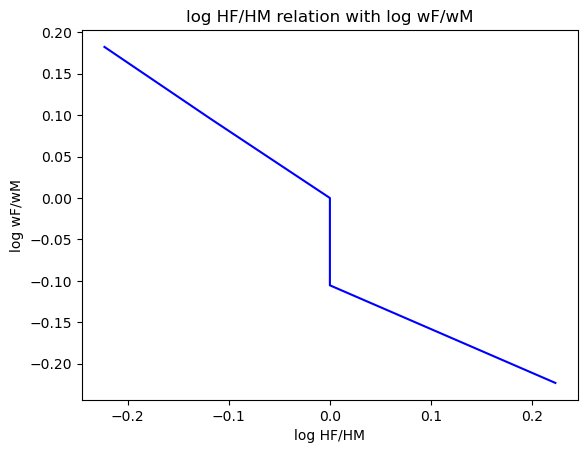

In [5]:
# Using the same loop method as in problem 1 we now loop for wF values

# Importing the class as the variable model

model = HouseholdSpecializationModelClass()

# Creating empty lists for values 

log_wF_wM = []
log_HF_HM = []
wf_values = model.par.wF_vec

for wF in wf_values:
    model = HouseholdSpecializationModelClass()
    model.par.wF = wF
    opt = model.solve_discrete()
    log_wF_wM.append(np.log(model.par.wF/model.par.wM))
    log_HF_HM.append(np.log(opt.HF/opt.HM))

# a. create the figure
fig = plt.figure()

# b. plot
ax = fig.add_subplot(1,1,1)

ax.plot(log_HF_HM,log_wF_wM, c="b")

ax.set_title('log HF/HM relation with log wF/wM')
ax.set_xlabel('log HF/HM')
ax.set_ylabel('log wF/wM')

3. plot $log H_F/H_M$ against $log w_F/w_M$ for $w_F \in [0.8, 0.9, 1, 1.1, 1.2]$ Now continously

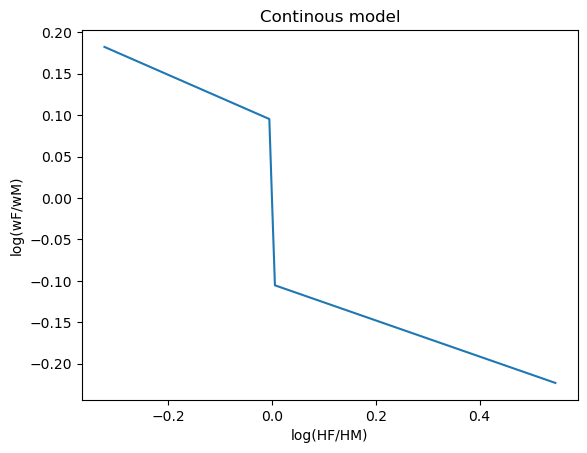

In [6]:
# Setting class

model = HouseholdSpecializationModelClass()

# Creating empty lists 

log_HF_HM_3 = []
log_wF_wM_3 = []

# Looping over female wages in calculating log ratios 

for wF in [0.8, 0.9, 1.0, 1.1, 1.2]: 
    
    model = HouseholdSpecializationModelClass()
    # Setting value for female wages
    model.par.wF = wF 
    # Solving model 
    opt = model.solve()
    # Calculating log ratios
    log_HF_HM = np.log(opt.HF/opt.HM)
    log_wF_wM = np.log(wF/model.par.wM)
    # Storing values in lists 
    log_HF_HM_3.append(log_HF_HM)
    log_wF_wM_3.append(log_wF_wM)

# Plotting the figure 

plt.plot(log_HF_HM_3, log_wF_wM_3, linestyle='-')
plt.xlabel('log(HF/HM)')
plt.ylabel('log(wF/wM)')
plt.title('Continous model')
plt.show()

4. Choose $\alpha$ and $\sigma$ such that it minimizes $(\beta_0-\hat{\beta}_0)^2+(\beta_1-\hat{\beta}_1)^2$. Illustrate how the model fit the data and discuss the economic interpretation of the results. 

/Users/juliusbuch/Desktop/projects-2023-julius-oskar/inauguralproject/HouseholdSpecializationModel.py:57: RuntimeWarning: divide by zero encountered in double_scalars
  H = HM**(1-par.alpha)*HF**par.alpha
/Users/juliusbuch/Desktop/projects-2023-julius-oskar/inauguralproject/HouseholdSpecializationModel.py:57: RuntimeWarning: invalid value encountered in double_scalars
  H = HM**(1-par.alpha)*HF**par.alpha


beta_0 = -0.2650908661124914, beta_1 = 0.5801766489789268, alpha = 1.349414021395659, sigma = 0.8495117382339767


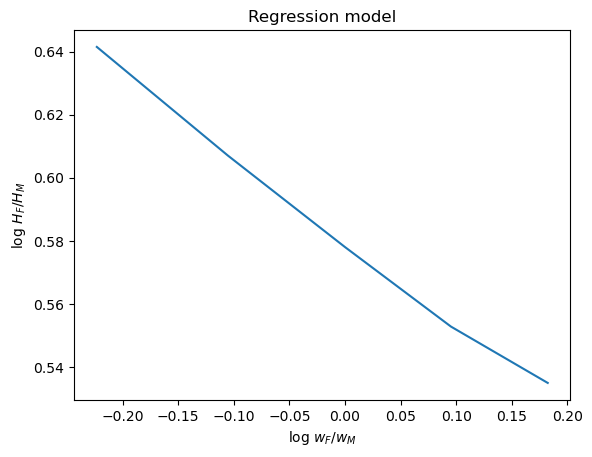

In [7]:
# Running the regression and estimation and printing our results

model.estimate() # See more in .py file
print(f'beta_0 = {model.sol.beta0}, beta_1 = {model.sol.beta1}, alpha = {model.par.alpha}, sigma = {model.par.sigma}')

model.par.alpha = model.par.alpha
model.par.sigma = model.par.sigma
wF_vec = [0.8, 0.9, 1.0, 1.1, 1.2]
log_HF_HM_4 = []
log_wF_wM_4 = []

# Solving the model with our estimates for alpha and sigma 

for i, wF in enumerate(wF_vec):
    model.par.wF = wF
    opt = model.solve()
    
    # Storing the results

    log_HF_HM_4.append(np.log(opt.HF/opt.HM))
    log_wF_wM_4.append(np.log(model.par.wF))

# Creating our plot

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Regression model')
ax.plot(log_wF_wM_4, log_HF_HM_4, linestyle = '-')
ax.set_xlabel("log $w_F/w_M$")
ax.set_ylabel("log $H_F/H_M$")
plt.show()